<a href="https://colab.research.google.com/github/perumalsanthosh/football_prediction/blob/main/football_score_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

results_df = pd.read_csv('results.csv')
shootouts_df = pd.read_csv('shootouts.csv')

# Convert date columns to datetime
results_df['date'] = pd.to_datetime(results_df['date'])
shootouts_df['date'] = pd.to_datetime(shootouts_df['date'])
# Handle missing values
results_df.fillna({'home_score': 0, 'away_score': 0}, inplace=True)


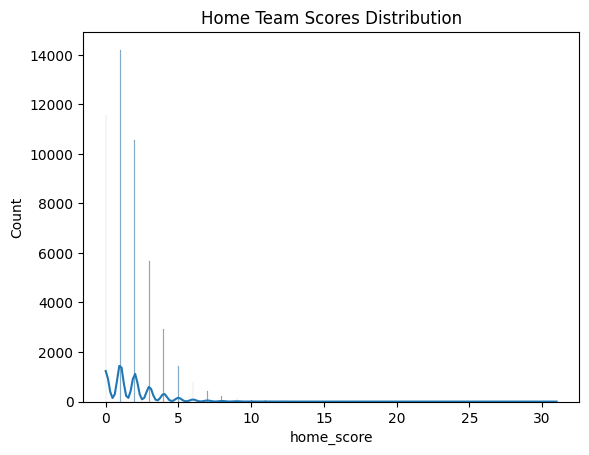

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of match scores
sns.histplot(results_df['home_score'], kde=True)
plt.title('Home Team Scores Distribution')
plt.show()


        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  goal_difference match_result  
0  Scotland    False                0         Draw  
1   England    False                2     Home Win  
2  Scotland    False                1     Home Win  
3   England    False                0         Draw  
4  Scotland    False                3     Home Win  
Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 1.0000
K-Nearest Neighbors (KNN) Accuracy: 0.9999
Support Vector Machine (SVM) Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000
Gradient Boosti

<ipython-input-10-edb9f35b57ea>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


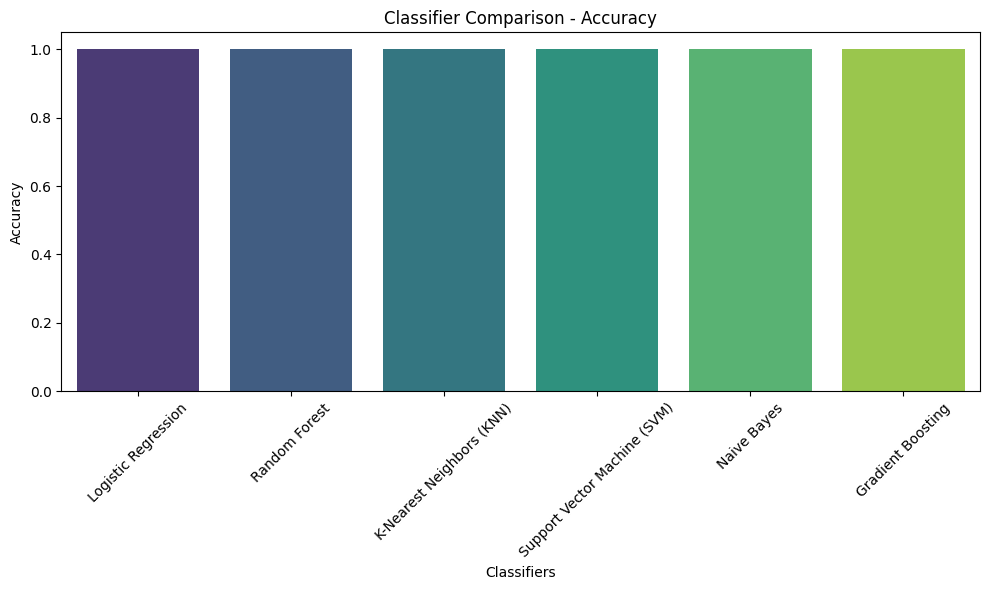

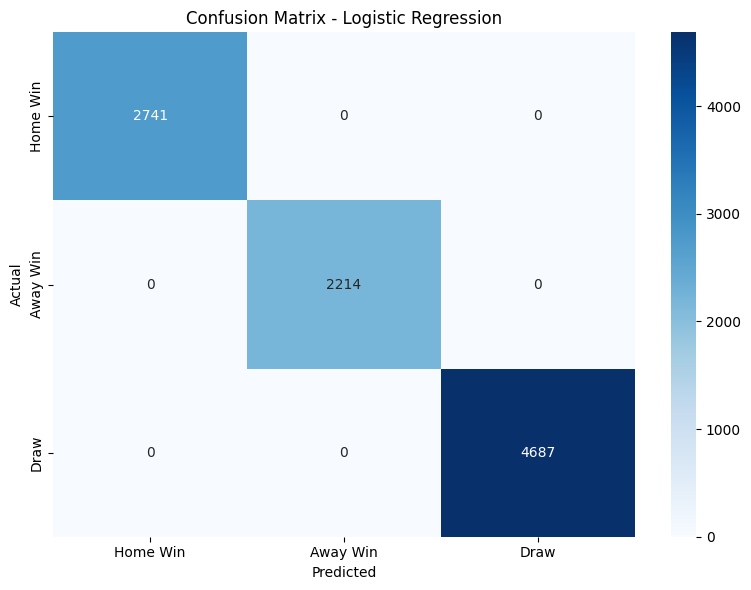

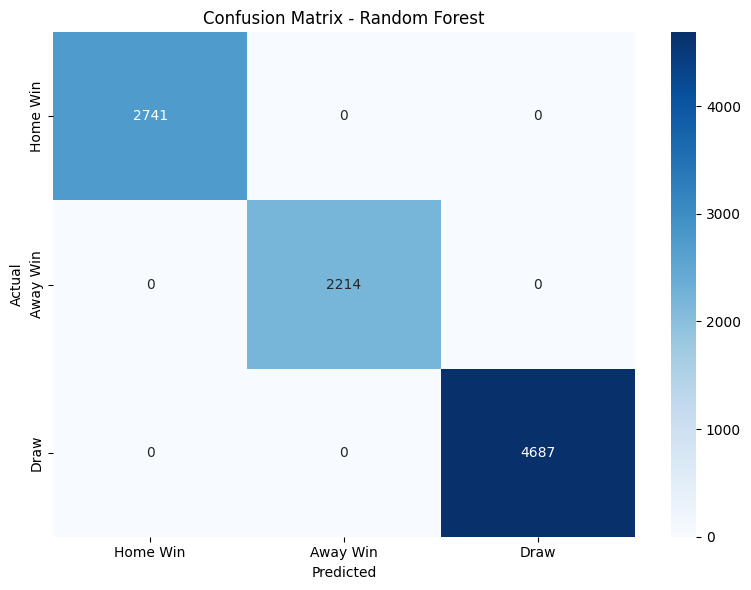

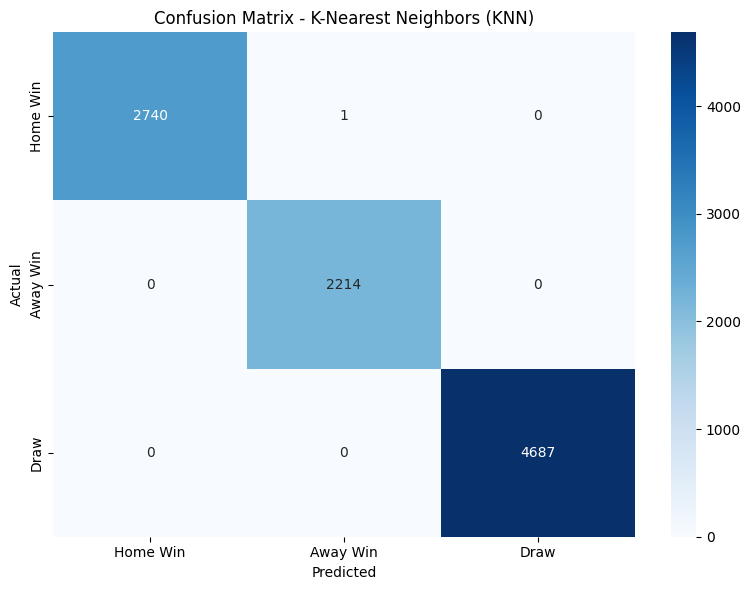

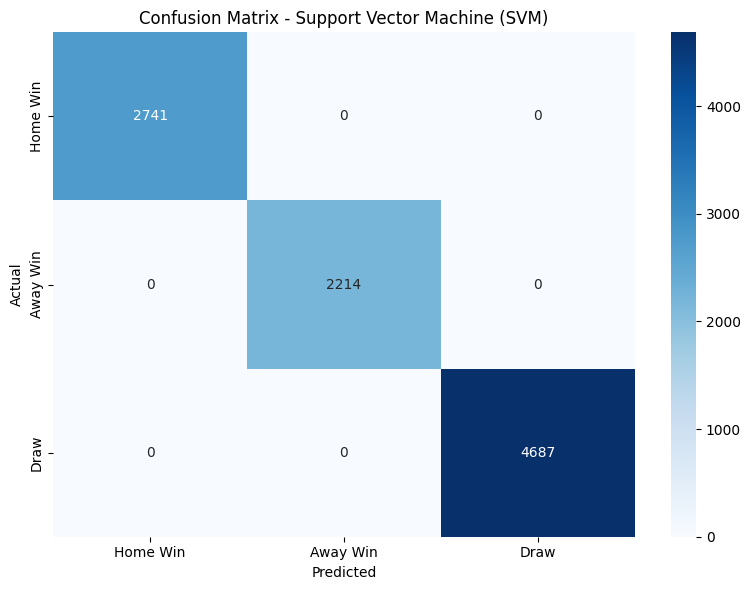

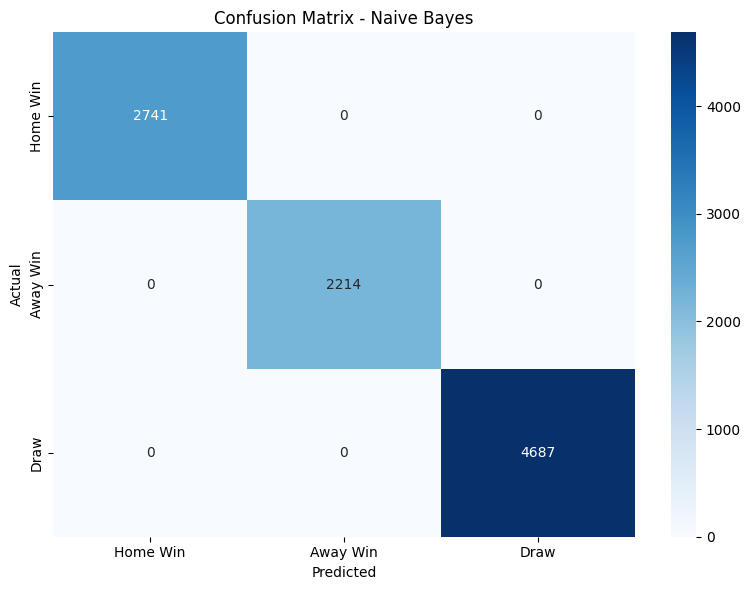

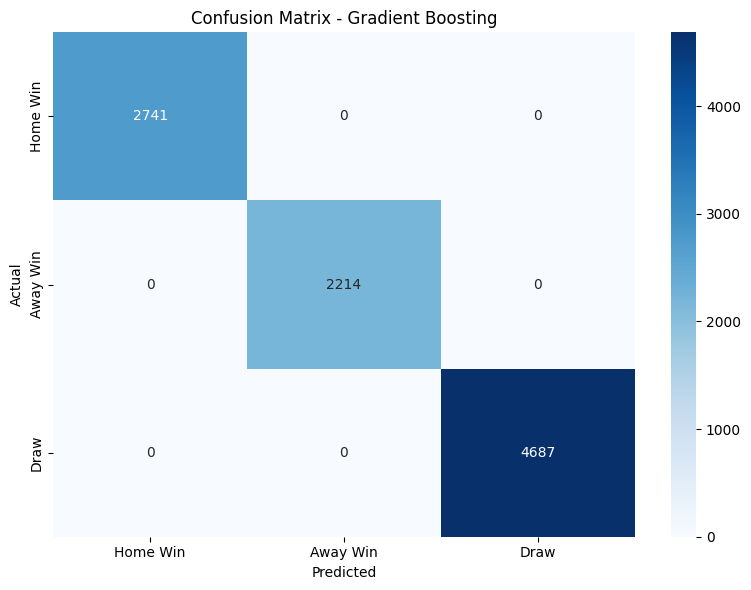

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    Away Win       1.00      1.00      1.00      2741
        Draw       1.00      1.00      1.00      2214
    Home Win       1.00      1.00      1.00      4687

    accuracy                           1.00      9642
   macro avg       1.00      1.00      1.00      9642
weighted avg       1.00      1.00      1.00      9642

Classification Report for Random Forest:
               precision    recall  f1-score   support

    Away Win       1.00      1.00      1.00      2741
        Draw       1.00      1.00      1.00      2214
    Home Win       1.00      1.00      1.00      4687

    accuracy                           1.00      9642
   macro avg       1.00      1.00      1.00      9642
weighted avg       1.00      1.00      1.00      9642

Classification Report for K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

    Away Win       1.00      1.00      

<ipython-input-10-edb9f35b57ea>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='coolwarm')


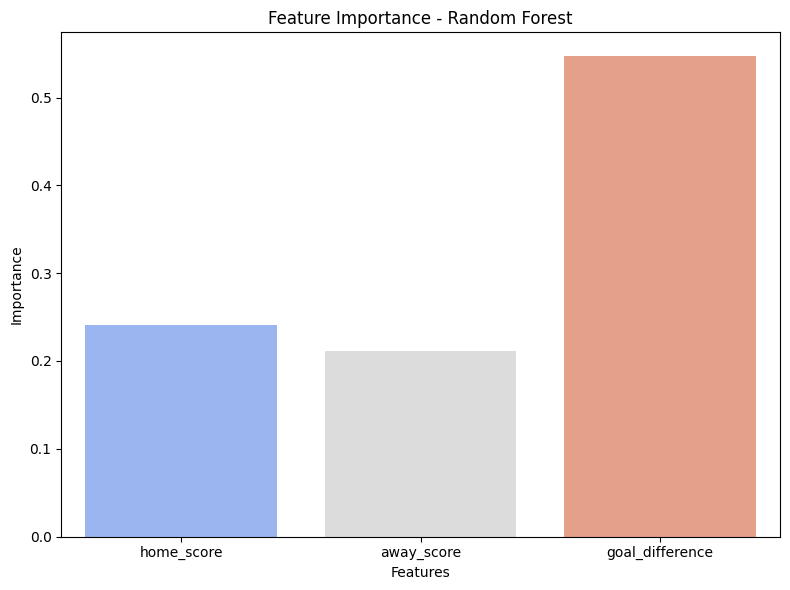

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Assuming you have already loaded your results_df

# Create the 'match_result' column if it doesn't exist
if 'match_result' not in results_df.columns:
    results_df['match_result'] = results_df.apply(
        lambda row: 'Home Win' if row['home_score'] > row['away_score'] else
        ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1
    )

# Check the first few rows to make sure 'match_result' column exists
print(results_df.head())

# Create the new feature 'goal_difference'
results_df['goal_difference'] = results_df['home_score'] - results_df['away_score']

# Define features (X) and target variable (y)
X = results_df[['home_score', 'away_score', 'goal_difference']]
y = results_df['match_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train each classifier and evaluate accuracy
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

# Plotting the accuracies of different classifiers
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Classifier Comparison - Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrix for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Win', 'Away Win', 'Draw'], yticklabels=['Home Win', 'Away Win', 'Draw'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Classification report for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

# Feature Importance for Random Forest Classifier (example)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_

# Plotting feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=importances, palette='coolwarm')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
